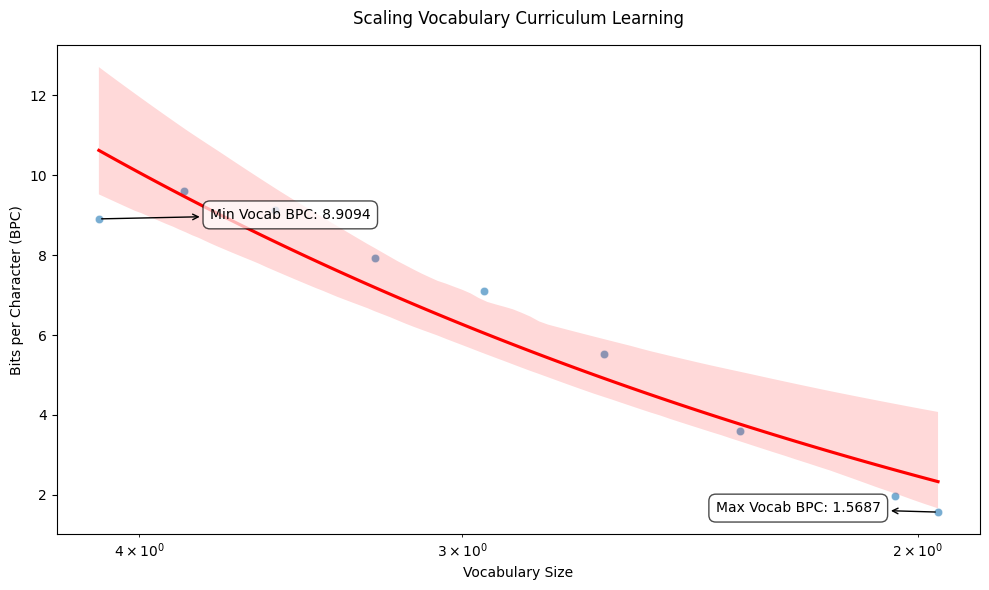

In [1]:
from plot import plot_bpc_vs_vocab_size

base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9

pkl_dir = "."
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = False,
                       title = "Scaling Vocabulary Curriculum Learning")

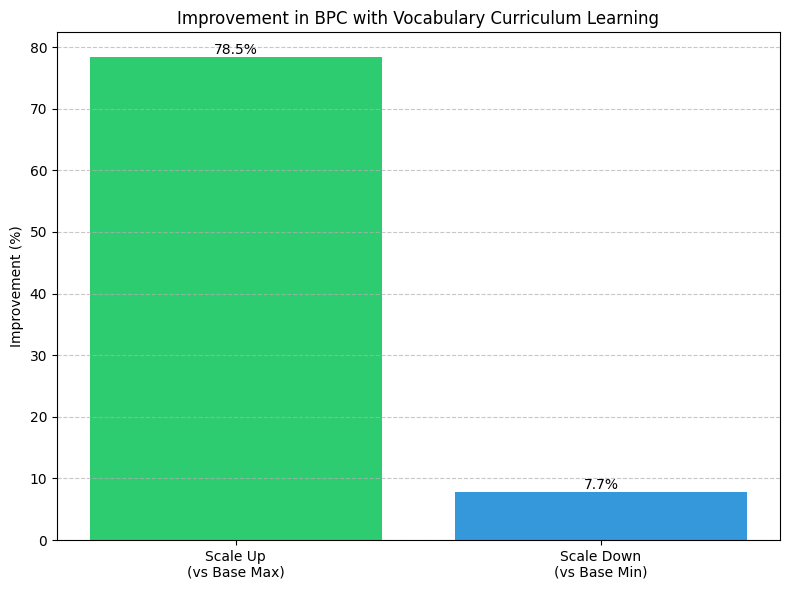

In [4]:
base_min_vocab_bpc = 1.7 
base_max_vocab_bpc = 8.9
scale_up_max_vocab_bpc = 1.9154
scale_down_min_vocab_bpc = 1.5687

import matplotlib.pyplot as plt
import numpy as np

# Calculate improvements
scale_up_improvement = ((base_max_vocab_bpc - scale_up_max_vocab_bpc) / base_max_vocab_bpc) * 100
scale_down_improvement = ((base_min_vocab_bpc - scale_down_min_vocab_bpc) / base_min_vocab_bpc) * 100

# Define the data
improvements = {
    'Scale Up\n(vs Base Max)': scale_up_improvement,
    'Scale Down\n(vs Base Min)': scale_down_improvement
}

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(improvements.keys(), improvements.values(), color=['#2ecc71', '#3498db'])

# Customize the plot
plt.title('Improvement in BPC with Vocabulary Curriculum Learning', fontsize=12)
plt.ylabel('Improvement (%)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

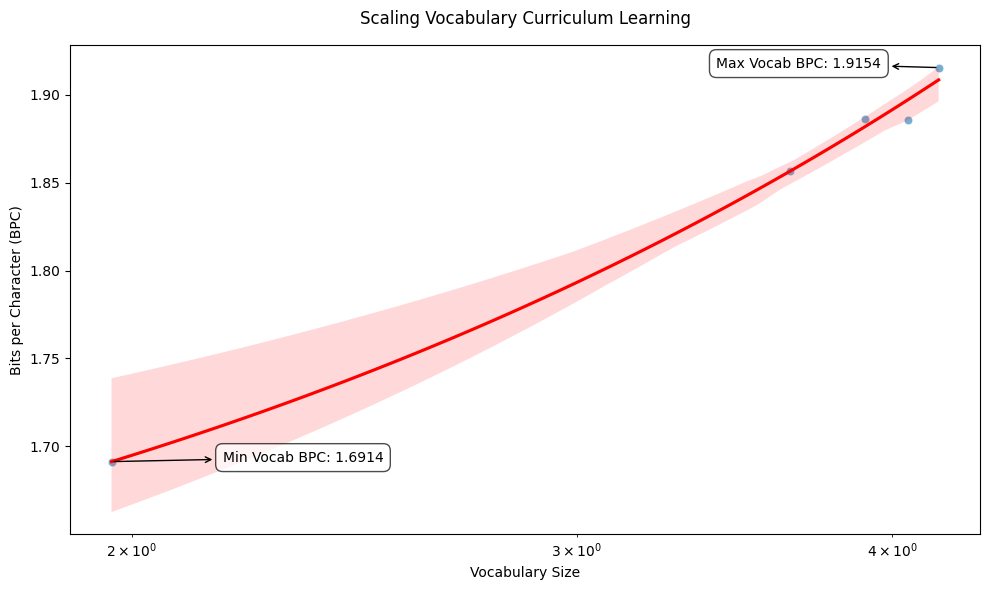

In [2]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run1"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

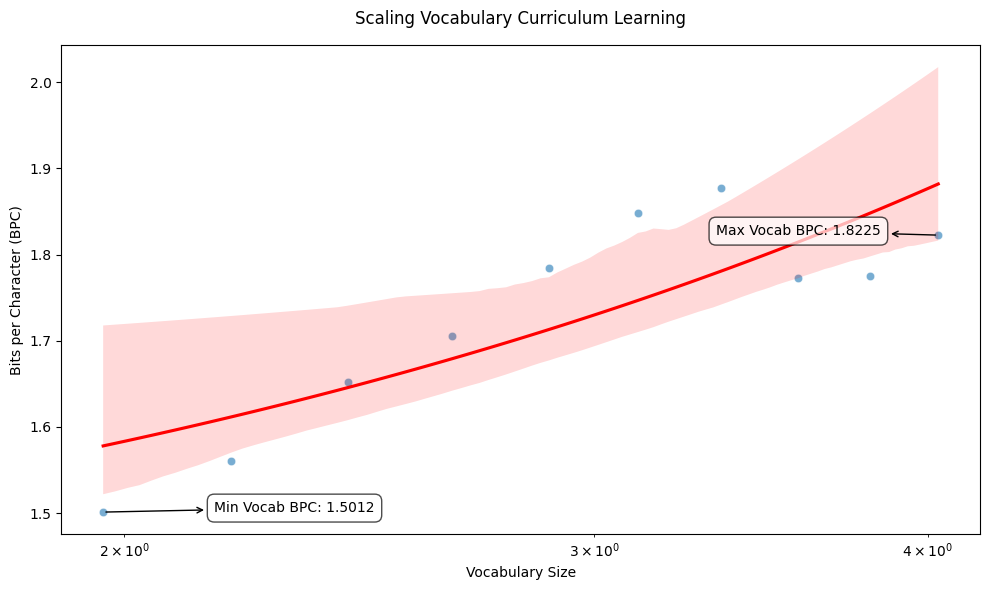

In [1]:
from plot import plot_bpc_vs_vocab_size

pkl_dir = "../run3"
plot_bpc_vs_vocab_size(pkl_dir, log_scale_vocab = True, 
                       increase_vocab_size = True,
                       title = "Scaling Vocabulary Curriculum Learning")

# the 3rd run also demonstrate the 'occilation' on BPC between 1.5 ~ 1.7 for the base vocabulary set-ups

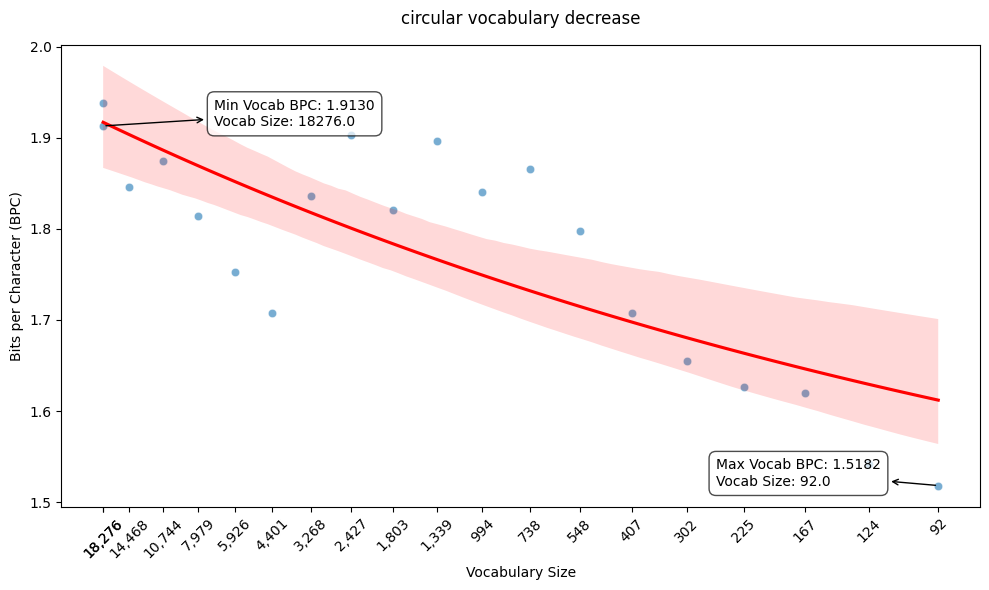

In [2]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5"
pkl_path = pkl_dir + "/decrease*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=False, title="circular vocabulary decrease")

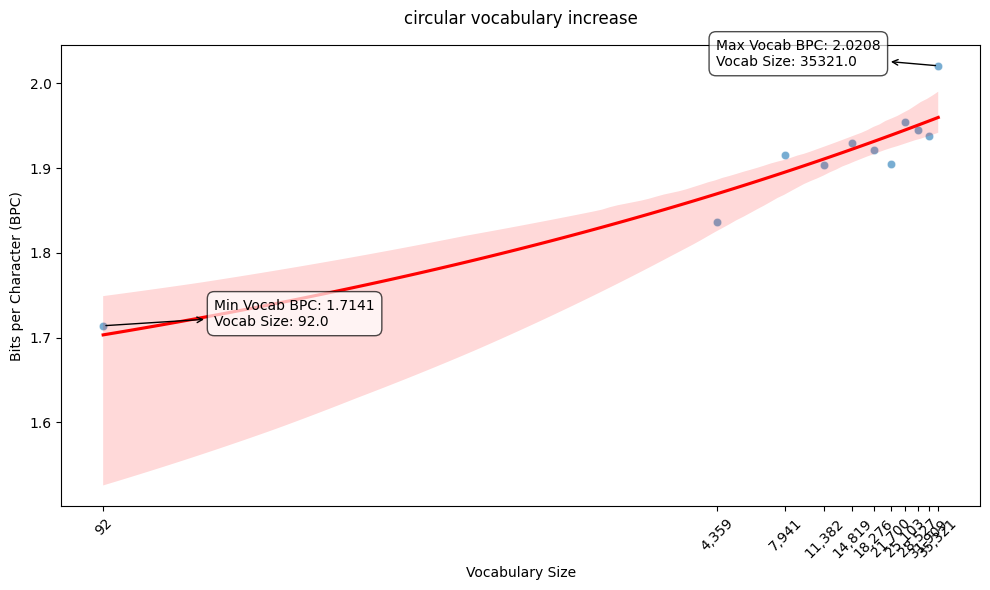

In [1]:
import pickle 
import glob 
from plot import _plot_bpc_vs_vocab

pkl_dir = "../run5"
pkl_path = pkl_dir + "/increase*.pkl"
vocab_sizes = []
bpcs = []
for pkl_path in glob.glob(pkl_path):
    with open(pkl_path, "rb") as f:
        info = pickle.load(f)
        vocab_size = info["config"]["vocab_size"]
        bpc = info["bpc"].item()
    vocab_sizes.append(vocab_size)
    bpcs.append(bpc)
    
_plot_bpc_vs_vocab(vocab_sizes, bpcs, log_scale_vocab=True, increase_vocab_size=True, title="circular vocabulary increase")


In [6]:
import glob 
import pickle 

pkl_path = "../run4/*_min_vocab.pkl"
pkl_path = glob.glob(pkl_path)[0]

with open(pkl_path, "rb") as f:
    info = pickle.load(f)


In [7]:
info

{'run_idx': 0,
 'bpc': tensor(1.6474),
 'model_type': 'GPT',
 'config': {'n_layer': 6,
  'n_head': 6,
  'n_embd': 384,
  'block_size': 512,
  'bias': False,
  'vocab_size': 92,
  'dropout': 0.2}}

In [8]:
0.1474 / 1.6474

0.08947432317591357

In [5]:
# min-vocab (92) 30k training iterations 
# 1. fixed vocabulary training: 1.6474
# 2. circulary vocabulary learning: 1.50
# 3. decreasing vocabulary learning: 1.568

# max-vocab (18434) 30k training iterations 
# 1. fixed vocabulary training: 2.0356
# 2. increasing vocabulary learning: 1.9022